<a href="https://colab.research.google.com/github/samyamaryal/K-Means-Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [4]:
df = pd.read_csv('income.csv')

In [5]:
df.sample(10)

,Name,Age,Income($)
3,Ismail,28,60000
5,Gautam,39,155000
4,Kory,42,150000
2,Mohan,29,61000
20,Sid,41,82000
21,Abdul,39,58000
6,David,41,160000
19,Alia,39,80000
17,Priyanka,41,63000
10,Donald,37,137000


In [6]:
df.rename(columns = {'Age':'age', 
                             'Income($)' : 'income'},
               inplace=True)
df

,Name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


<Axes: xlabel='age', ylabel='income'>

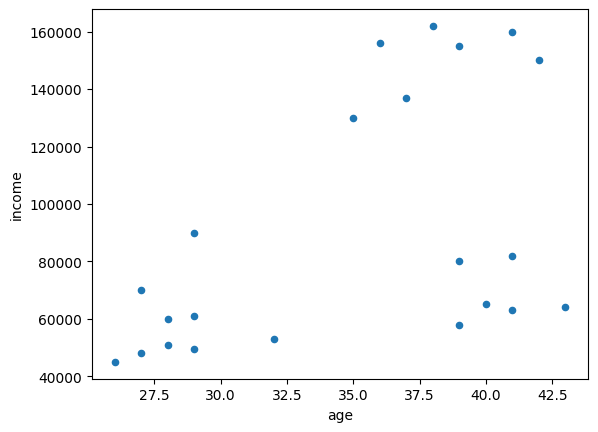

In [7]:
%matplotlib inline
df.plot(x = 'age', y = 'income', kind = 'scatter')

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_income = scaler.fit_transform(df[['income']])
scaled_age = scaler.fit_transform(df[['age']])

In [9]:
N_CLUSTERS = 2

In [24]:
from sklearn.cluster import KMeans

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [43]:
class KMeansPredictor():
  def __init__(self, N_CLUSTERS, scaled_income, scaled_age, df):
    self.N_CLUSTERS = N_CLUSTERS
    self.scaled_income = scaled_income
    self.scaled_age = scaled_age
    self.df = df

  def predictor(self):
    km=KMeans(n_clusters = self.N_CLUSTERS, n_init = 10)
    df['scaled_income'] = self.scaled_income
    df['scaled_age'] = self.scaled_age
    pred=km.fit_predict(df[['scaled_income', 'scaled_age']])
    self.pred = pred
    return pred

  def addtodf(self, df):
    df['predicted'] = self.pred
    return df
  
  def plot_clusters(self):
    sns.scatterplot(data = self.df, x='age', y='income', hue='predicted', palette = 'Paired')


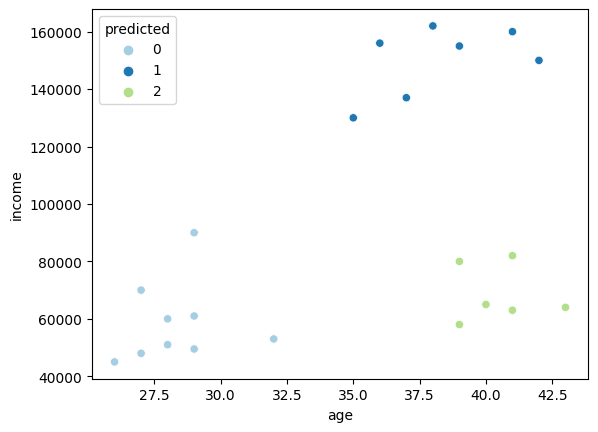

In [44]:
pred = KMeansPredictor(3, scaled_income, scaled_age, df)
vals = pred.predictor()
new_df = pred.addtodf(df)
pred.plot_clusters()